In [17]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [18]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

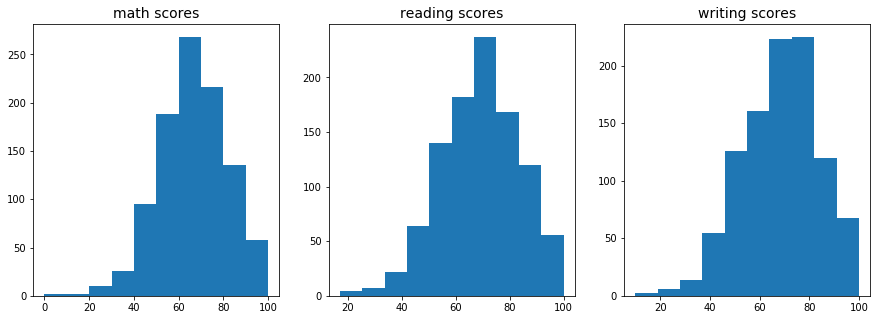

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(df['math score'])
plt.title('math scores', fontsize=14)

plt.subplot(1,3,2)
plt.hist(df['reading score'])
plt.title('reading scores', fontsize=14)

plt.subplot(1,3,3)
plt.hist(df['writing score'])
plt.title('writing scores', fontsize=14)

plt.show()

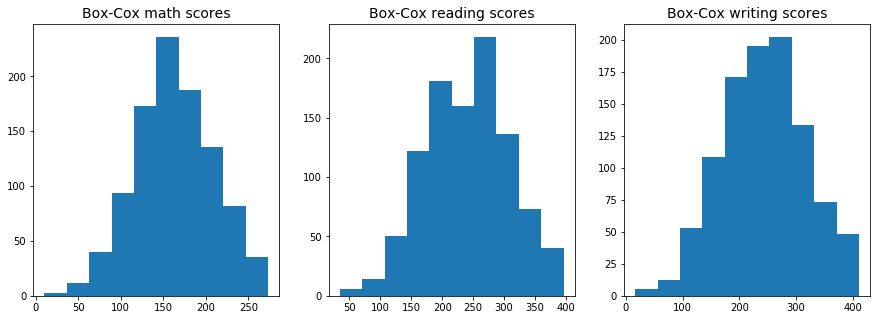

In [24]:
boxcox_math_scores = stats.boxcox(df[df['math score'] > 0]['math score'])[0]
boxcox_reading_scores = stats.boxcox(df['reading score'])[0]
boxcox_writing_scores = stats.boxcox(df['writing score'])[0]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(boxcox_math_scores)
plt.title('Box-Cox math scores', fontsize=14)

plt.subplot(1,3,2)
plt.hist(boxcox_reading_scores)
plt.title('Box-Cox reading scores', fontsize=14)

plt.subplot(1,3,3)
plt.hist(boxcox_writing_scores)
plt.title('Box-Cox writing scores', fontsize=14)

plt.show()

In [28]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

# test math scores for normailty

jb_test = jarque_bera(boxcox_math_scores)
norm_test = normaltest(boxcox_math_scores)

print('Math scores test for normailty: \nThe jarque-bera test statistic is {} and the p-value is {}.'.format(jb_test[0], jb_test[1]))
print('The normailty test statistic is {} and the p-value is {}.\n'.format(norm_test[0], norm_test[1]))

# test reading scores for normailty

jb_test = jarque_bera(boxcox_reading_scores)
norm_test = normaltest(boxcox_reading_scores)

print('Reading scores test for normailty: \nThe jarque-bera test statistic is {} and the p-value is {}.'.format(jb_test[0], jb_test[1]))
print('The normailty test statistic is {} and the p-value is {}.\n'.format(norm_test[0], norm_test[1]))

# test writing scores for normailty

jb_test = jarque_bera(boxcox_writing_scores)
norm_test = normaltest(boxcox_writing_scores)

print('Writing scores test for normailty: \nThe jarque-bera test statistic is {} and the p-value is {}.'.format(jb_test[0], jb_test[1]))
print('The normailty test statistic is {} and the p-value is {}.\n'.format(norm_test[0], norm_test[1]))

Math scores test for normailty: 
The jarque-bera test statistic is 1.7200982636836308 and the p-value is 0.42314129209599327.
The normailty test statistic is 1.8323075851586939 and the p-value is 0.4000547794685686.

Reading scores test for normailty: 
The jarque-bera test statistic is 4.119778573559666 and the p-value is 0.127468081515408.
The normailty test statistic is 5.282274606965809 and the p-value is 0.07128015626992971.

Writing scores test for normailty: 
The jarque-bera test statistic is 4.746478090042761 and the p-value is 0.09317842784043195.
The normailty test statistic is 6.267311355052559 and the p-value is 0.04355827085003712.



Before the Box-Cox transformation, all the test scores were not normally distributed. After the tranformatation, the scores more resembled a normal distribution.

# 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox

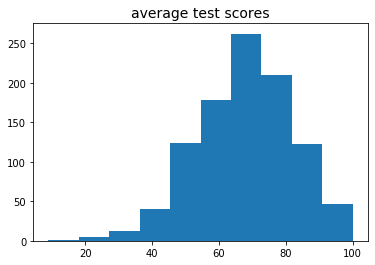

average scores test for normailty: 
The jarque-bera test statistic is 15.453387913085168 and the p-value is 0.00044089934264401887.
The normailty test statistic is 15.186721327231322 and the p-value is 0.0005037851534494478.



In [32]:
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

plt.hist(df['average score'])
plt.title('average test scores', fontsize=14)

plt.show()

jb_test = jarque_bera(df['average score'])
norm_test = normaltest(df['average score'])

print('average scores test for normailty: \nThe jarque-bera test statistic is {} and the p-value is {}.'.format(jb_test[0], jb_test[1]))
print('The normailty test statistic is {} and the p-value is {}.\n'.format(norm_test[0], norm_test[1]))

The distribution is not normal, and we must use Box-Cox transformation.

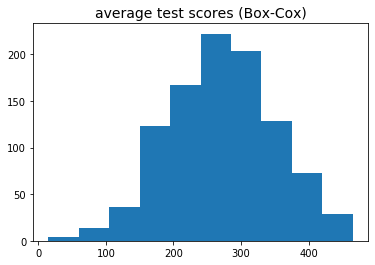

average scores test for normailty after Box-Cox transformation: 
The jarque-bera test statistic is 2.4353989331279 and the p-value is 0.2959101356398447.
The normailty test statistic is 2.779857602227616 and the p-value is 0.24909303914726724.



In [33]:
box_cox_average = stats.boxcox(df['average score'])[0]

plt.hist(box_cox_average)
plt.title('average test scores (Box-Cox)', fontsize=14)

plt.show()

jb_test = jarque_bera(box_cox_average)
norm_test = normaltest(box_cox_average)

print('average scores test for normailty after Box-Cox transformation: \nThe jarque-bera test statistic is {} and the p-value is {}.'.format(jb_test[0], jb_test[1]))
print('The normailty test statistic is {} and the p-value is {}.\n'.format(norm_test[0], norm_test[1]))

After transformation, the average test scores do resemble a normal distribution.

# 3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

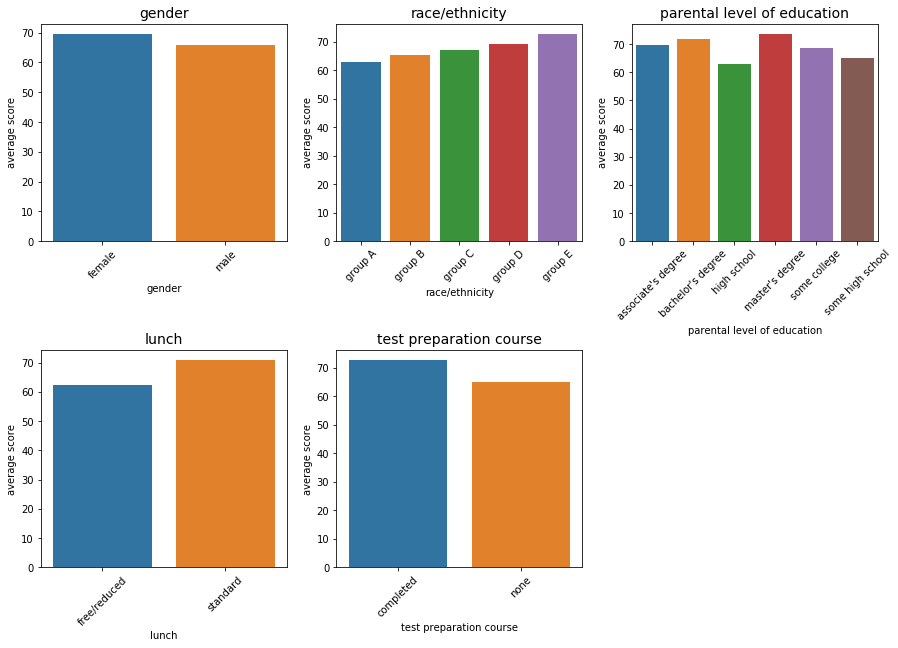

In [52]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=.5)

index = 1
for col in df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]:
    plt.subplot(2, 3, index)
    sns.barplot(x=df.groupby(col).mean().index, y=df.groupby(col).mean()['average score'])
    plt.xticks(rotation=45)
    plt.title(col, fontsize=14)
    index += 1

plt.show()

All of the varibles seem to affect the average test scores. Therefore, all the variables will be useful.